In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/speed-dating/speed_data_data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/kaggle/input/speed-dating/speed_data_data.csv")

In [4]:
df.head()

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,21.0,69487.0,2.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0


In [5]:
'''
gender: Kişinin cinsiyetini belirtir. Genellikle 0 ve 1 gibi sayısal değerlerle kodlanır, örneğin, 0 kadın ve 1 erkek olarak.

age: Kişinin yaşı.

income: Kişinin geliri. Genellikle belirli bir dönemdeki gelirini ifade eder.

goal: Kişinin ilişkiden beklentilerini veya ilişki hedefini belirtir. Bu sütunun tam olarak neyi ifade ettiğine bağlı olarak farklı değerler alabilir.

career: Kişinin mesleğini veya kariyerini belirtir.

dec: Kişinin karar alma sürecinde çekici bulduğu özellikleri derecelendirir. Örneğin, çekicilik, ciddiyet gibi.

attr: Kişinin karar alma sürecinde çekici bulduğu özellikleri değerlendirir.

sinc: Kişinin karar alma sürecinde samimi bulduğu özellikleri değerlendirir.

intel: Kişinin karar alma sürecinde zeki bulduğu özellikleri değerlendirir.

fun: Kişinin karar alma sürecinde eğlenceli bulduğu özellikleri değerlendirir.

amb: Kişinin karar alma sürecinde çekici bulduğu ancak aynı zamanda rekabetçi veya hırslı bulduğu özellikleri değerlendirir.

shar: Kişinin karar alma sürecinde paylaşımcı bulduğu özellikleri değerlendirir.

like: Karar verilen kişiyi ne kadar beğendiğini ifade eder.,

prob: Karar verilen kişinin ilgilenmesi durumunda o kişiyle bir araya gelme olasılığını ifade eder.

met: Kişinin karar alma sürecinde görüştüğü kişiyle daha önce buluşup buluşmadığını belirtir.
'''

'\ngender: Kişinin cinsiyetini belirtir. Genellikle 0 ve 1 gibi sayısal değerlerle kodlanır, örneğin, 0 kadın ve 1 erkek olarak.\n\nage: Kişinin yaşı.\n\nincome: Kişinin geliri. Genellikle belirli bir dönemdeki gelirini ifade eder.\n\ngoal: Kişinin ilişkiden beklentilerini veya ilişki hedefini belirtir. Bu sütunun tam olarak neyi ifade ettiğine bağlı olarak farklı değerler alabilir.\n\ncareer: Kişinin mesleğini veya kariyerini belirtir.\n\ndec: Kişinin karar alma sürecinde çekici bulduğu özellikleri derecelendirir. Örneğin, çekicilik, ciddiyet gibi.\n\nattr: Kişinin karar alma sürecinde çekici bulduğu özellikleri değerlendirir.\n\nsinc: Kişinin karar alma sürecinde samimi bulduğu özellikleri değerlendirir.\n\nintel: Kişinin karar alma sürecinde zeki bulduğu özellikleri değerlendirir.\n\nfun: Kişinin karar alma sürecinde eğlenceli bulduğu özellikleri değerlendirir.\n\namb: Kişinin karar alma sürecinde çekici bulduğu ancak aynı zamanda rekabetçi veya hırslı bulduğu özellikleri değerlendi

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,8378.0,0.500597,0.500029,0.0,0.0,1.0,1.0,1.0
age,8283.0,26.358928,3.566763,18.0,24.0,26.0,28.0,55.0
income,4279.0,44887.606450,17206.920962,8607.0,31516.0,43185.0,54303.0,109031.0
goal,8299.0,2.122063,1.407181,1.0,1.0,2.0,2.0,6.0
dec,8378.0,0.419909,0.493573,0.0,0.0,0.0,1.0,1.0
attr,8176.0,6.189995,1.950169,0.0,5.0,6.0,8.0,10.0
sinc,8101.0,7.175164,1.740315,0.0,6.0,7.0,8.0,10.0
intel,8082.0,7.368597,1.550453,0.0,6.0,7.0,8.0,10.0
fun,8028.0,6.400598,1.953702,0.0,5.0,7.0,8.0,10.0
amb,7666.0,6.777524,1.794055,0.0,6.0,7.0,8.0,10.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  8378 non-null   int64  
 1   age     8283 non-null   float64
 2   income  4279 non-null   float64
 3   goal    8299 non-null   float64
 4   career  8289 non-null   object 
 5   dec     8378 non-null   int64  
 6   attr    8176 non-null   float64
 7   sinc    8101 non-null   float64
 8   intel   8082 non-null   float64
 9   fun     8028 non-null   float64
 10  amb     7666 non-null   float64
 11  shar    7311 non-null   float64
 12  like    8138 non-null   float64
 13  prob    8069 non-null   float64
 14  met     8003 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 981.9+ KB


In [8]:
df["career"].value_counts()

career
Finance                     202
professor                   199
Lawyer                      154
Professor                   148
Consulting                  147
                           ... 
teaching                      5
MBA                           5
engineering professional      5
Asset Management              5
a research position           5
Name: count, Length: 367, dtype: int64

# DATA WRANGLING

In [9]:
df

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,21.0,69487.0,2.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,25.0,NaN,1.0,assistant master of the universe (otherwise it...,0,3.0,5.0,5.0,5.0,NaN,NaN,2.0,5.0,0.0
8374,1,25.0,NaN,1.0,assistant master of the universe (otherwise it...,0,4.0,6.0,8.0,4.0,4.0,NaN,4.0,4.0,0.0
8375,1,25.0,NaN,1.0,assistant master of the universe (otherwise it...,0,4.0,7.0,8.0,8.0,8.0,NaN,6.0,5.0,0.0
8376,1,25.0,NaN,1.0,assistant master of the universe (otherwise it...,0,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,0.0


In [10]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()] 
cols_with_missing

df.drop(cols_with_missing, axis=1, inplace=False)

,gender,dec
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
8373,1,0
8374,1,0
8375,1,0
8376,1,0


In [11]:
df[df["age"].isna()]

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
828,0,NaN,NaN,NaN,NaN,0,4.0,9.0,9.0,8.0,8.0,5.0,5.0,9.0,2.0
829,0,NaN,NaN,NaN,NaN,1,7.0,7.0,8.0,5.0,NaN,4.0,6.0,7.0,2.0
830,0,NaN,NaN,NaN,NaN,1,6.0,7.0,9.0,8.0,7.0,5.0,5.0,8.0,2.0
831,0,NaN,NaN,NaN,NaN,1,8.0,8.0,9.0,9.0,7.0,8.0,8.0,9.0,2.0
832,0,NaN,NaN,NaN,NaN,0,5.0,9.0,9.0,9.0,9.0,5.0,5.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,0,NaN,NaN,1.0,Actress,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7494,0,NaN,NaN,1.0,Actress,0,7.0,9.0,9.0,6.0,8.0,7.0,5.0,5.0,0.0
7495,0,NaN,NaN,1.0,Actress,0,6.0,8.0,9.0,6.0,8.0,6.0,6.0,8.0,0.0
7496,0,NaN,NaN,1.0,Actress,0,5.0,8.0,9.0,5.0,8.0,5.0,5.0,5.0,0.0


In [12]:
df[df[["career", "income", "goal"]].isnull().all(axis=1)]

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
312,0,26.0,NaN,NaN,NaN,0,3.0,6.0,6.0,6.0,5.0,2.0,2.0,4.0,2.0
313,0,26.0,NaN,NaN,NaN,0,2.0,6.0,5.0,4.0,5.0,2.0,2.0,2.0,2.0
314,0,26.0,NaN,NaN,NaN,0,3.0,5.0,8.0,5.0,8.0,3.0,3.0,3.0,2.0
315,0,26.0,NaN,NaN,NaN,0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,4.5,2.0
316,0,26.0,NaN,NaN,NaN,0,4.0,6.0,7.0,4.0,5.0,2.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5127,0,NaN,NaN,NaN,NaN,0,6.0,7.0,8.0,6.0,7.0,4.0,6.0,2.0,0.0
5128,0,NaN,NaN,NaN,NaN,0,8.0,8.0,9.0,7.0,7.0,8.0,8.0,5.0,0.0
5129,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5130,0,NaN,NaN,NaN,NaN,0,6.0,6.0,5.0,4.0,4.0,3.0,4.0,3.0,0.0


There are two columns in the dataframe with no empty values, this is important 

In [13]:
df.drop(df[df[["career", "income", "goal"]].isnull().all(axis=1)].index, inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8299 entries, 0 to 8377
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  8299 non-null   int64  
 1   age     8267 non-null   float64
 2   income  4279 non-null   float64
 3   goal    8299 non-null   float64
 4   career  8289 non-null   object 
 5   dec     8299 non-null   int64  
 6   attr    8105 non-null   float64
 7   sinc    8030 non-null   float64
 8   intel   8011 non-null   float64
 9   fun     7957 non-null   float64
 10  amb     7596 non-null   float64
 11  shar    7240 non-null   float64
 12  like    8067 non-null   float64
 13  prob    7999 non-null   float64
 14  met     7933 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 1.0+ MB


# EDA Analyst

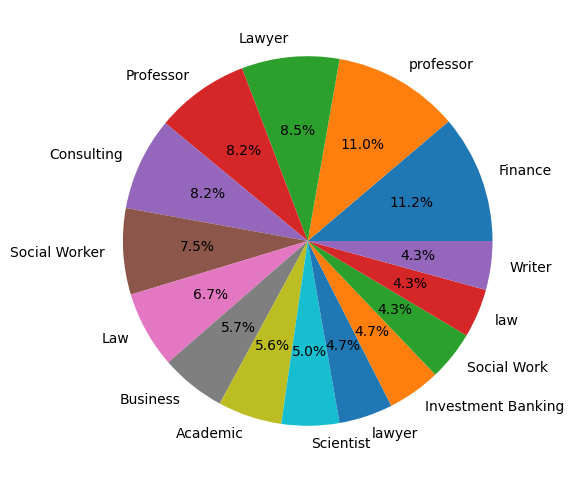

In [15]:
# The most repeated 15 profession
plt.figure(figsize=(10, 6))
pie_chart = plt.pie(x=df["career"].value_counts().nlargest(15), labels=df["career"].value_counts().nlargest(15).index, autopct="%1.1f%%")

plt.show()


In [ ]:
# Best of job from speed dating
plt.figure(figsize=(10,80))
ax = sns.countplot(data=df, y='career', order=df['career'].value_counts().index)  # y parametresini kullanarak dikey bir çubuk grafiği oluşturun

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=11, color='black', xytext=(5, 0),
                textcoords='offset points')


plt.xlabel('Frequency')  
plt.ylabel('Career')
plt.title('Frequency of Each Career')  
plt.show()  

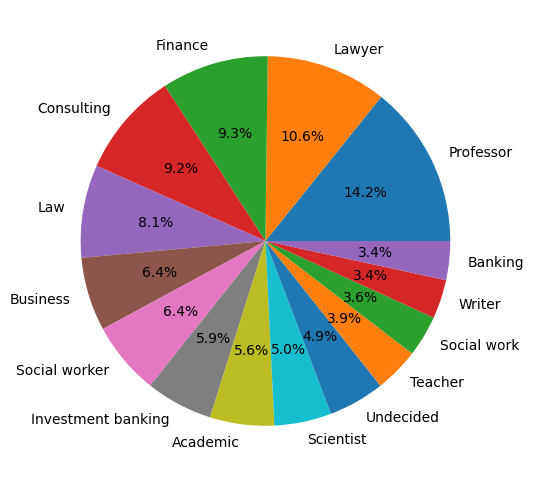

In [17]:
# career columns have same name job so we must organise them
df['career'] = df['career'].str.capitalize()
# The most repeated 15 profession
plt.figure(figsize=(10, 6))
pie_chart = plt.pie(x=df["career"].value_counts().nlargest(15), labels=df["career"].value_counts().nlargest(15).index, autopct="%1.1f%%")

plt.show()

In [18]:
# Best of job from speed dating
plt.figure(figsize=(10,80))
ax = sns.countplot(data=df, y='career', order=df['career'].value_counts().index)  s

for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', fontsize=11, color='black', xytext=(5, 0),
                textcoords='offset points')


plt.xlabel('Frequency')  
plt.ylabel('Career')
plt.title('Frequency of Each Career')  
plt.show()  

SyntaxError: invalid syntax (3748547093.py, line 3)

In [ ]:
grouped_df = df.groupby('career').mean()

In [ ]:
grouped_df

# Corelation Matris

In [ ]:
corelation_matris=grouped_df.corr()

In [ ]:
corelation_matris

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data=corelation_matris,annot=True, cmap='coolwarm', fmt=".2f")


In [ ]:
'''
gender: Indicates the gender of the person. It is usually coded with numeric values such as 0 and 1, for example, 0 being female and 1 being male.

age: The age of the person.

income: The person's income. Usually refers to the person's income in a given period.

goal: Indicates the person's expectations from the relationship or relationship goal. Depending on what exactly this column refers to, it can take different values.

career: Indicates the person's occupation or career.

dec: Ranks the characteristics that the person finds attractive in the decision-making process. For example, attractiveness, seriousness, etc.

attr: Evaluates the characteristics that the person finds attractive in the decision-making process.

sinc: Evaluates the characteristics that the person finds sincere in the decision-making process.

intel: Evaluates the characteristics that the person finds b in the decision-making process.

fun: Evaluates the characteristics that the person finds fun in the decision-making process.

amb: Evaluates traits that the person finds attractive but also competitive or ambitious in the decision-making process.

shar: Evaluates the characteristics that the person finds sharing in the decision-making process.

like: Expresses how much the person likes the decision-maker,

prob: Expresses the probability of getting together with the person if the decision-maker is interested.

met: Indicates whether the person has met with the person he/she met during the decision-making process before.
‘’’

# Age Statistic
![](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExeWxxeDg1NTg0N2d6NDVlNnRycHA2bXVibnY0NWNrdm1veTFlbDM3diZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/8JrcyXvpOaFbFIatkm/giphy.gif)

In [ ]:
df_age=df["age"].value_counts().sort_index()

In [ ]:
df_age=pd.DataFrame(data=df_age)

In [ ]:
df_age

## Age Statistic histogram 

In [ ]:
plt.figure(figsize=(12,6))
#sns.histplot(data=df_age,x='age', weights='count',kde=True,bins=40);
ax1 = sns.histplot(data=df_age, x='age', weights='count', kde=True, bins=30)

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Gender-goal-decision statistic
![](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExMzV5bnpwNTlnOGUzdDR3MDY3cm52emE0Z3kyZHoxbmw1OW1laGhkaCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/bJHuTtnYYt3Xi/giphy.gif)

In [ ]:
df["goal"].value_counts()

In [ ]:
g = sns.displot(
    df, x="goal", col="dec", row="gender",
    binwidth=1, height=5, facet_kws=dict(margin_titles=True),
)

for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

In [ ]:
df["met"].value_counts()

In [ ]:
df["dec"].value_counts()

In [ ]:
g = sns.displot(
    df, x="met", col="dec", row="gender",
    binwidth=1, height=5, facet_kws=dict(margin_titles=True),
)

for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Income Statistic 
![Duck](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcDM3Z2l3aHdqYW95YWs3NWdicHd5a3VhejduYjBsYnp2bTVyeWJjZCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xTiTnqUxyWbsAXq7Ju/giphy.gif)


In [ ]:
df_income=pd.DataFrame(df["income"].value_counts())
df_income.reset_index( inplace=True)

In [ ]:
df_income

In [ ]:

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df_income, x='income', weights='count', bins=20, kde=True, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution')
plt.grid(True)
plt.show()
